## Assignment 3
### Group Members: Yannick Heard, Timothy Lai, Christine Mulcahy, Daniel Quijano, Elena Reynolds

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import re

scores = pd.read_csv('Assignment 3 Sentiment Scores.csv')
scores.head()

/Users/timothylai/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [2]:
models = scores.columns.tolist()
models

['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ', 'Sclass']

In [3]:
edge_list = []

def get_edges():
    for model1 in models:
        for model2 in models[models.index(model1)+1:]:
            pos_sent = []
            neg_sent = []
            for i in range(0,len(scores)):
                sent_model1 = scores[model1][i]
                sent_model2 = scores[model2][i]
                if (not(np.isnan(sent_model1)) & (not(np.isnan(sent_model2)))):
                    edge_weight = sent_model1 - sent_model2
                    if edge_weight >= 0:
                        pos_sent.append(edge_weight)
                    elif edge_weight < 0:
                        neg_sent.append(edge_weight)
            if len(pos_sent) > 0:
                edge_list.append([model1, model2, np.mean(pos_sent)])
            if len(neg_sent) > 0:
                edge_list.append([model2, model1, abs(np.mean(neg_sent))])
    return edge_list

get_edges()

[['ES', 'LS', 0.30434782608695654],
 ['LS', 'ES', 2.0],
 ['ES', 'RX', 0.83333333333333337],
 ['RX', 'ES', 2.0],
 ['ES', 'A8', 2.8333333333333335],
 ['A8', 'ES', 3.0],
 ['ES', 'A6', 6.0],
 ['A6', 'ES', 1.6666666666666667],
 ['ES', '3series', 3.25],
 ['3series', 'ES', 6.0],
 ['ES', '5series', 4.0],
 ['5series', 'ES', 5.0],
 ['ES', '7series', 3.0],
 ['7series', 'ES', 2.7999999999999998],
 ['ES', 'XJ', 0.5],
 ['XJ', 'ES', 1.0],
 ['ES', 'Sclass', 3.2857142857142856],
 ['Sclass', 'ES', 2.6153846153846154],
 ['LS', 'RX', 1.0],
 ['RX', 'LS', 1.1428571428571428],
 ['LS', 'A8', 2.3529411764705883],
 ['A8', 'LS', 2.8378378378378377],
 ['LS', 'A6', 2.7272727272727271],
 ['A6', 'LS', 1.2857142857142858],
 ['LS', '3series', 2.3333333333333335],
 ['3series', 'LS', 4.0],
 ['LS', '5series', 2.4545454545454546],
 ['5series', 'LS', 3.1000000000000001],
 ['LS', '7series', 2.1142857142857143],
 ['7series', 'LS', 2.75],
 ['LS', 'XJ', 2.0],
 ['XJ', 'LS', 2.8888888888888888],
 ['LS', 'Sclass', 2.1477272727272

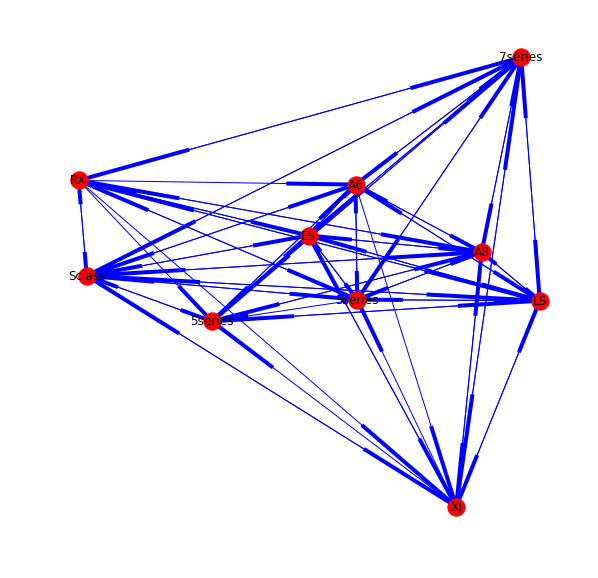

In [4]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodesize=20)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color = 'b', arrows=True)
plt.axis('off')
plt.show()

### Part (b)

In [5]:
page_rank_unweighted = nx.pagerank(G, alpha = 0.99, weight = 1)
page_rank_unweighted

{'3series': 0.09315393834610573,
 '5series': 0.10468175461478667,
 '7series': 0.10986869703854982,
 'A6': 0.0982533295721719,
 'A8': 0.10986869703854985,
 'ES': 0.10986869703854983,
 'LS': 0.10986869703854982,
 'RX': 0.07295573223238781,
 'Sclass': 0.10986869703854982,
 'XJ': 0.08161176004179858}

In [6]:
page_rank_weighted = nx.pagerank(G, alpha = 0.99)
page_rank_weighted

{'3series': 0.10735667075588687,
 '5series': 0.098209925633999079,
 '7series': 0.071673100210594323,
 'A6': 0.13625204213015285,
 'A8': 0.14893030745926053,
 'ES': 0.14212528644935021,
 'LS': 0.11277502731113064,
 'RX': 0.050368637316756081,
 'Sclass': 0.080150282429632375,
 'XJ': 0.052158720303237205}

In [7]:
partb_df1 = pd.DataFrame.from_dict(page_rank_unweighted, orient = 'index')
partb_df2 = pd.DataFrame.from_dict(page_rank_weighted, orient = 'index')
partb_df1.columns = ['Page Rank Unweighted']
partb_df2.columns = ['Page Rank Weighted']
partb_df1 = partb_df1.sort_index()
partb_df2 = partb_df2.sort_index()

partb_df = pd.concat([partb_df1,partb_df2], axis=1)
partb_df['Sales'] = [220000, 60000, 14000, 20000, 12000, 135000, 30000, 120000, 25000, 6600]
partb_df.sort_values('Sales', ascending=False)

,Page Rank Unweighted,Page Rank Weighted,Sales
3series,0.093154,0.107357,220000
ES,0.109869,0.142125,135000
RX,0.072956,0.050369,120000
5series,0.104682,0.098210,60000
LS,0.109869,0.112775,30000
Sclass,0.109869,0.080150,25000
A6,0.098253,0.136252,20000
7series,0.109869,0.071673,14000
A8,0.109869,0.148930,12000
XJ,0.081612,0.052159,6600


In [8]:
partb_df['Page Rank Unweighted'].corr(partb_df['Sales'])

-0.28944274294681338

In [9]:
partb_df['Page Rank Weighted'].corr(partb_df['Sales'])

0.074980268832453636

### Part (c)

#### Note: We manually renamed the header on Sheet 3 of the Edmunds Reviews excel file to "Review" so as to be consistent with all other sheets in the file. That way, all reviews would fall in the same dataframe column.

In [19]:
ed = pd.read_excel('Edmunds Reviews.xlsx', sheetname = 0)
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 1))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 2))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 3))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 4))
ed = ed.append(pd.read_excel('Edmunds Reviews.xlsx', sheetname = 5))
len(ed)

1308

In [20]:
sentscores_df = pd.DataFrame(np.nan, index = ed.index, columns=models)

sid = SIA()

i = 0
for review in ed['Review']:
    for b in models:
        brandsentlist =[]
        for match in re.finditer(b, review):
            begin = match.start()
            end = match.end()
            sentence = review[begin-70:end+70]
            sentiment = sid.polarity_scores(sentence)['compound']
            brandsentlist.append(sentiment)
        brand_message_sent = np.mean(brandsentlist)
        sentscores_df[b][i] = brand_message_sent
        i+=1

sentscores_df

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,0.75235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ed

,Post,Review
0,NaN,":P I like you, Merc. You make me laugh! If Mat..."
1,NaN,I am surprised that I did not find any discuss...
2,NaN,I am surprised that I did not find any discuss...
3,NaN,. . .let me see if I am following along correc...
4,NaN,". . .now hold on a minute. A ""current"" A6 4.2 ..."
5,NaN,but has anyone noticed the front oh the new ac...
6,NaN,""""" I think in the luxury car market 10-20% is ..."
7,NaN,""""" I think in the luxury car market 10-20% is ..."
8,NaN,"...cointunied from previous post...""Globally, ..."
9,NaN,"...cointunied from previous post...""Globally, ..."
